# Finding Heavy Traffic Indicators on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway]("https://en.wikipedia.org/wiki/Interstate_94").

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## The I-94 Traffic Dataset

John Hogue made the dataset available that we'll be working with, and you can download it from the [UCI Machine Learning Repository]("https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume").

In [1]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.head(5) # First five rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail(5) # Last five rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()  # Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

The [dataset documentation]("https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume") mentions that a station located approximately midway between **Minneapolis** and **Saint Paul** recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

<img src="https://s3.amazonaws.com/dq-content/524/i94_figma.png" alt="Image" width="500" height="600">

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

We're going to start our analysis by examining the distribution of the **traffic_volume** column.

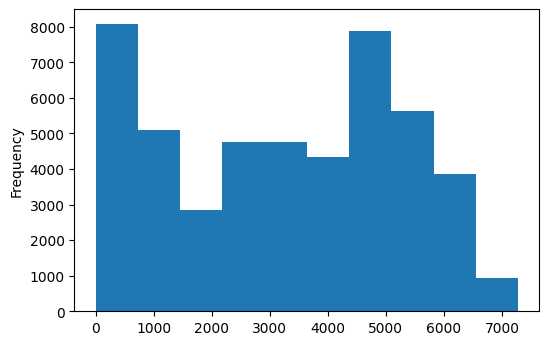

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

traffic["traffic_volume"].plot.hist()
plt.show()

In [5]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7280 cars, with an average of 3260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.



## Traffic Volume: Day vs. Night

The possibility that nighttime and daytime might influnece traffic volume gives our analysis an interesting direct: comparing daytime and nighttime data.

We'll start by dividing the dataset into two parts: 
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [6]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

day = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)] 
print(day.shape)
night = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)] 
print(night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

## Traffic Volume: Day vs. Night (II)

Previously, we divided the dataset into two parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

Now we're going to compare the traffic volume at night and during day.

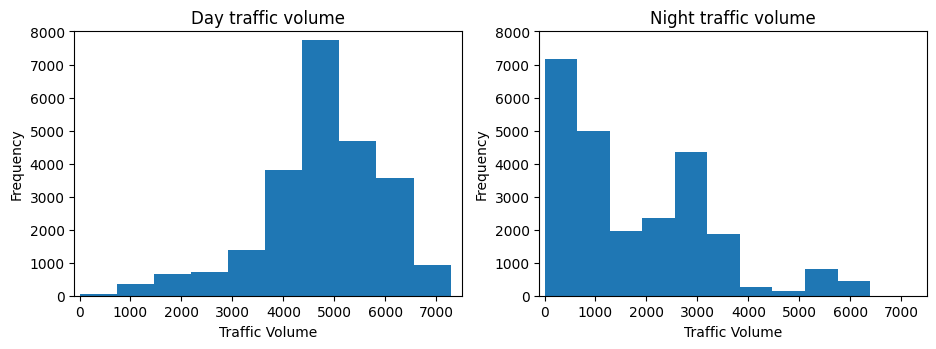

In [7]:
plt.figure(figsize = (11,3.5)) # To organize the two histograms 
# side-by-side on a grid chart.

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day traffic volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night traffic volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.show()

In [8]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

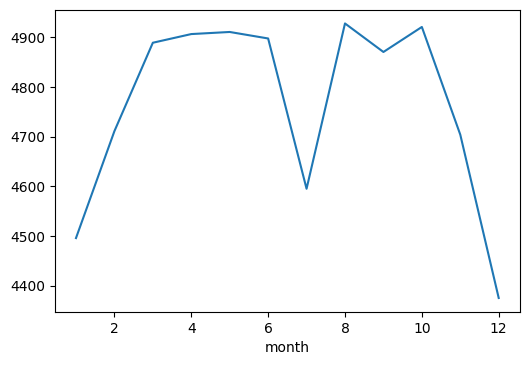

In [11]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

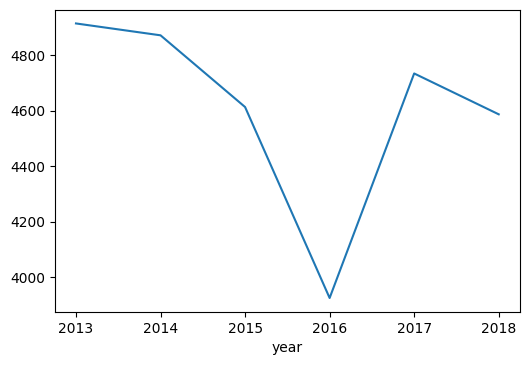

In [12]:
day['year'] = day['date_time'].dt.year
only_july = day[day["month"] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

We'll now continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we'll need to use the following code:

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

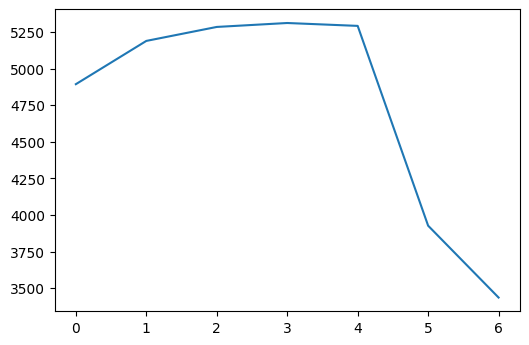

In [14]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

## Time Indicators(III)

In [15]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


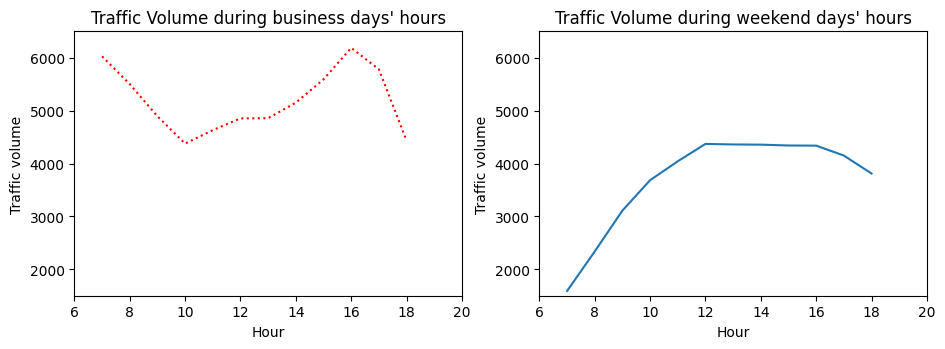

In [16]:
plt.figure(figsize = (11, 3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'], ls = ':', color = 'r')
plt.title('Traffic Volume during business days\' hours')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume during weekend days\' hours')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. 

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume` .

In [17]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns(`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`.

Let's generate a scatter plot to visualize the correlation between `traffic_volume` and `temp`. 

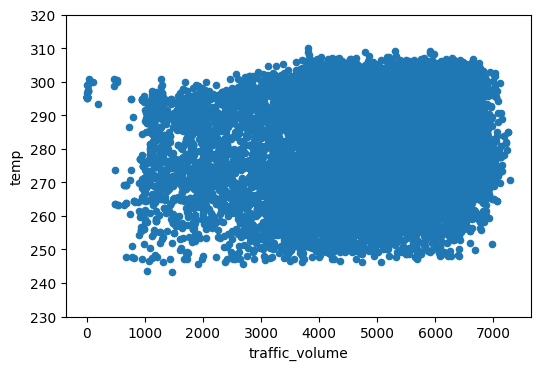

In [18]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.



## Weather Types

To start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages.

In [19]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

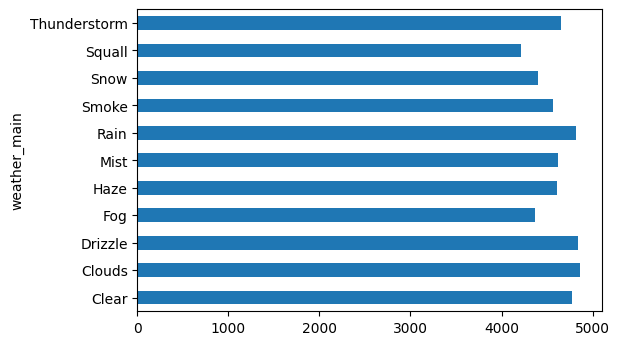

In [20]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. 

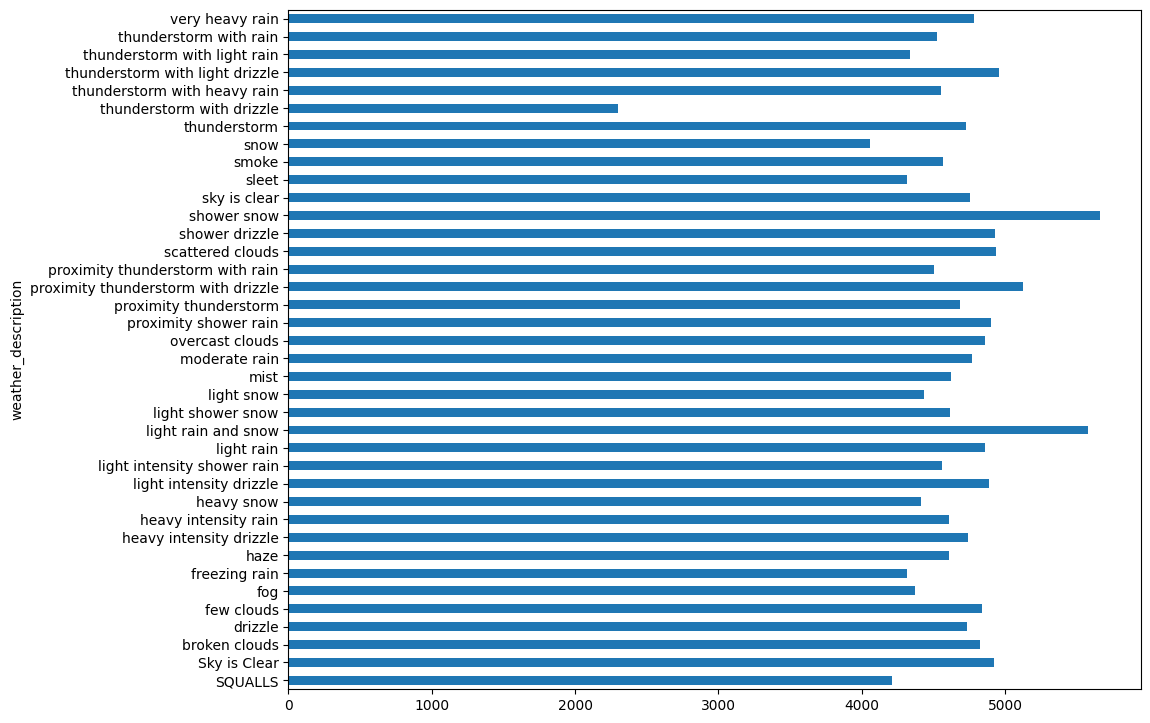

In [21]:
by_weather_description['traffic_volume'].plot.barh(figsize = (11,9))
plt.show()

We find out that during `light rain and snow`, `shower snow`, and `proximity thurderstorm with drizzle` the traffic volume exceeds 5000 limit. 

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators: 
- Time Indicators
 -  The traffic is usually heavier during warm months(March-October) compared to cold months(November-February).
 -  The traffic is usually heavier on business days compared to the weekends.
 -  On business days, the rush hours are around 7 and 16. 

- Weather indicators
 - Shower snow
 - Light rain and snow
 - Proximity thunderstorm with drizzle